카프카에서 사용하는 개념은 다음과 같다.
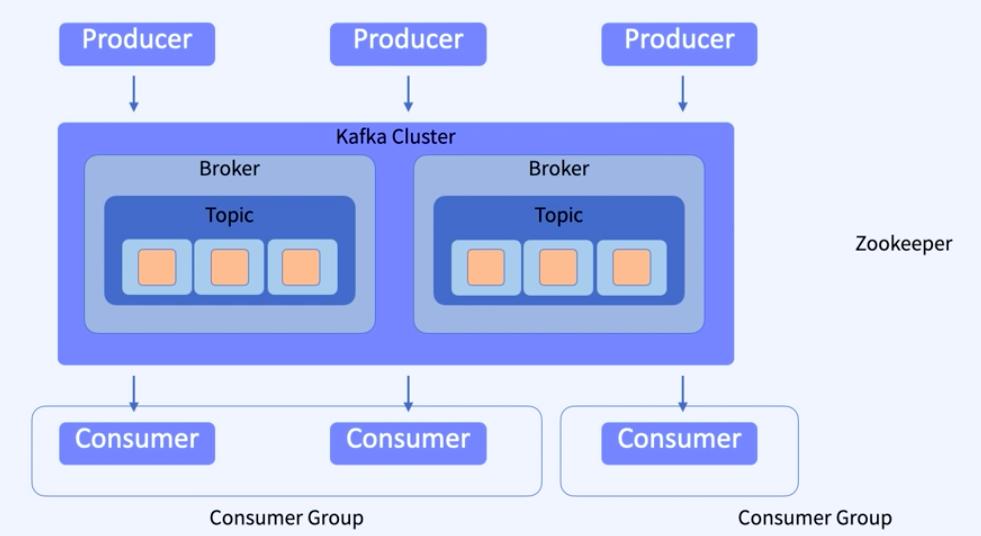

[ 구성요소 ]
- Topic: 하나의 체널 또는 폴더로 비유 가능, Producer와 Consumer가 소통하는 체널
- Broker: 하나의 서버라고 보면 됨, Topic을 서빙하는 주체
- Producer: 메시지를 보내는 역할
- Consumer: 메시지를 받는 역할
- Partition: 그림에서 Topic 안쪽의 큰 사각형, 실제 디스크에 어떻게 저장될 지 구분
- Offset: 그림에서 Partition 안쪽의 사각형, Partition에 정렬된 메시지의 순서
- Cluster: 고가용성이나 확장성을 위해 여러개의 Broker를 사용하는 단위 
- Zookeeper: Cluster 내의 여러 설정들을 관리
------------
[ Cluster & Replication ]
- Key: Producer가 보낸 메시지가 같은 Partition에 저장될 수 있도록 설정하는 값, 없다면 Round-Robin 방식으로 Partition에 분배되어 저장됨
- Retention period: 데이터를 저장하는 기간
- Replication Factor: Partition을 얼마나 복사해서 보관할지를 결정, 복사된 Partition 중에는 Reader Partition이 선정되고 Read/Write 모두 Reader Partition을 통해서 이루어짐
-----------
[ Consumer Group & Consumer ]
- Consumer Group: 모든 Partition으로부터 데이터를 받을 수 있다
- Consumer: 생성될 때 Consumer Group을 지정하지 않으면 새로운 Consumer Group을 생성한다. 특정 Partition으로부터만 데이터를 받을 수 있다
- Rebalancing: Consumer가 추가되거나 삭제될 때 Partition과의 매칭을 관리
---------
[ Zookeeper가 하는 일 ]
- Cluster관리: Cluster에 존재하는 Broker를 관리하고 모니터링
- Topic관리: Topic리스트를 관리하고 Topic에 할당된 Partition과 Replication 관리
- Partition Reader 관리: Partition Reader가 될 Broker를 선택하고 Reader가 다운될 경우 다음 Reader를 선택
- Broker끼리 서로 발견할 수 있도록 정보 전달

## Kafka 설치

간단하게 https://kafka.apache.org/downloads 링크에 가서 쓰고자 하는 버전을 다운로드 받고  
접근이 편한 경로에 압축을 풀고 사용하면 된다.

In [5]:
# Zookeeper server start
!cd ~/kafka_2.13-3.0.0
!./bin/zookeeper-server-start.sh -daemon ./config/zookeeper.properties

In [ ]:
# Kafka server start
!cd ~/kafka_2.13-3.0.0
!./bin/kafka-server-start.sh -daemon ./config/server.properties

In [ ]:
# Topic creation
!cd ~/kafka_2.13-3.0.0
!./bin/kafka-topics.sh --create --bootstrap-server localhost:9092 --topic first-topic --partitions  1 --replication-factor 1
!./bin/kafka-topics.sh --list --bootstrap-server localhost:9092
!./bin/kafka-topics.sh --describe --bootstrap-server localhost:9092

In [ ]:
# Producer console
!cd ~/kafka_2.13-3.0.0
!./bin/kafka-console-producer.sh --bootstrap-server localhost:9092 --topic first-topic

In [ ]:
# Consumer console
!cd ~/kafka_2.13-3.0.0
!./bin/kafka-console-consumer.sh --bootstrap-server localhost:9092 --topic first-topic

위와 같이 Zookeeper server, Kafka server를 실행시키고 Topic을 만들어  
Producer console로 메시지를 보내면 Consumer console에서 수신되는 것을 확인할 수 있다.
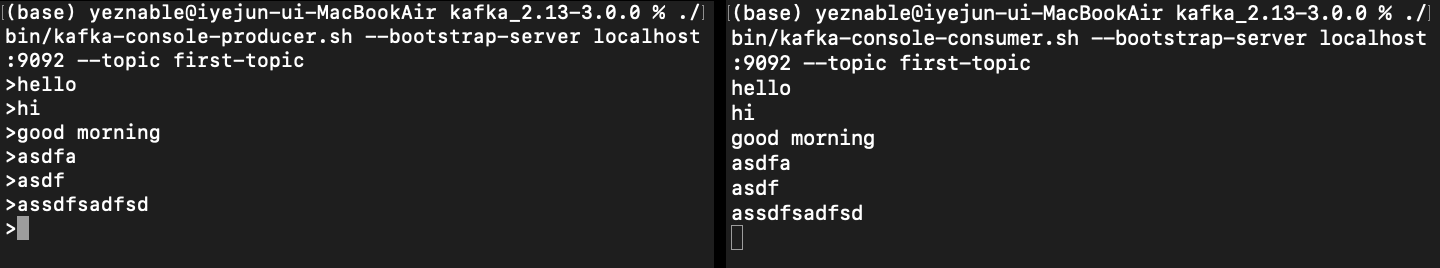

In [ ]:
# Consumer group
# 해당 Broker에 어떤 Consumer group이 있는지 확인
!./bin/kafka-consumer-groups.sh --bootstrap-server localhost:9092 --list
# Consumer group을 지정하여 consumer를 실행
!./bin/kafka-console-consumer.sh --bootstrap-server localhost:9092 --topic first-topic --group first-group
# Consumer group describe
!./bin/kafka-consumer-groups.sh --bootstrap-server localhost:9092 --describe-group first-group

여러 Producer와 Consumer가 동작하는 방식을 확인하기 위해서는 tmux라는 프로그램을 활용하면 좋다.  
다음 링크로 들어가서 활용법을 참고  
https://bluecolorsky.tistory.com/32

----------
2개의 Producer와 2개의 Consumer가 Partition이 하나인 Topic을 바라보게 생성하여 메시지를 보내보면 다음과 같이 하나의 Consumer로만 메시지가 전달되는 것을 확인할 수 있다.  
이는 Consumer가 지정된 Partition으로부터만 메시지를 받을 수 있기 때문이다.
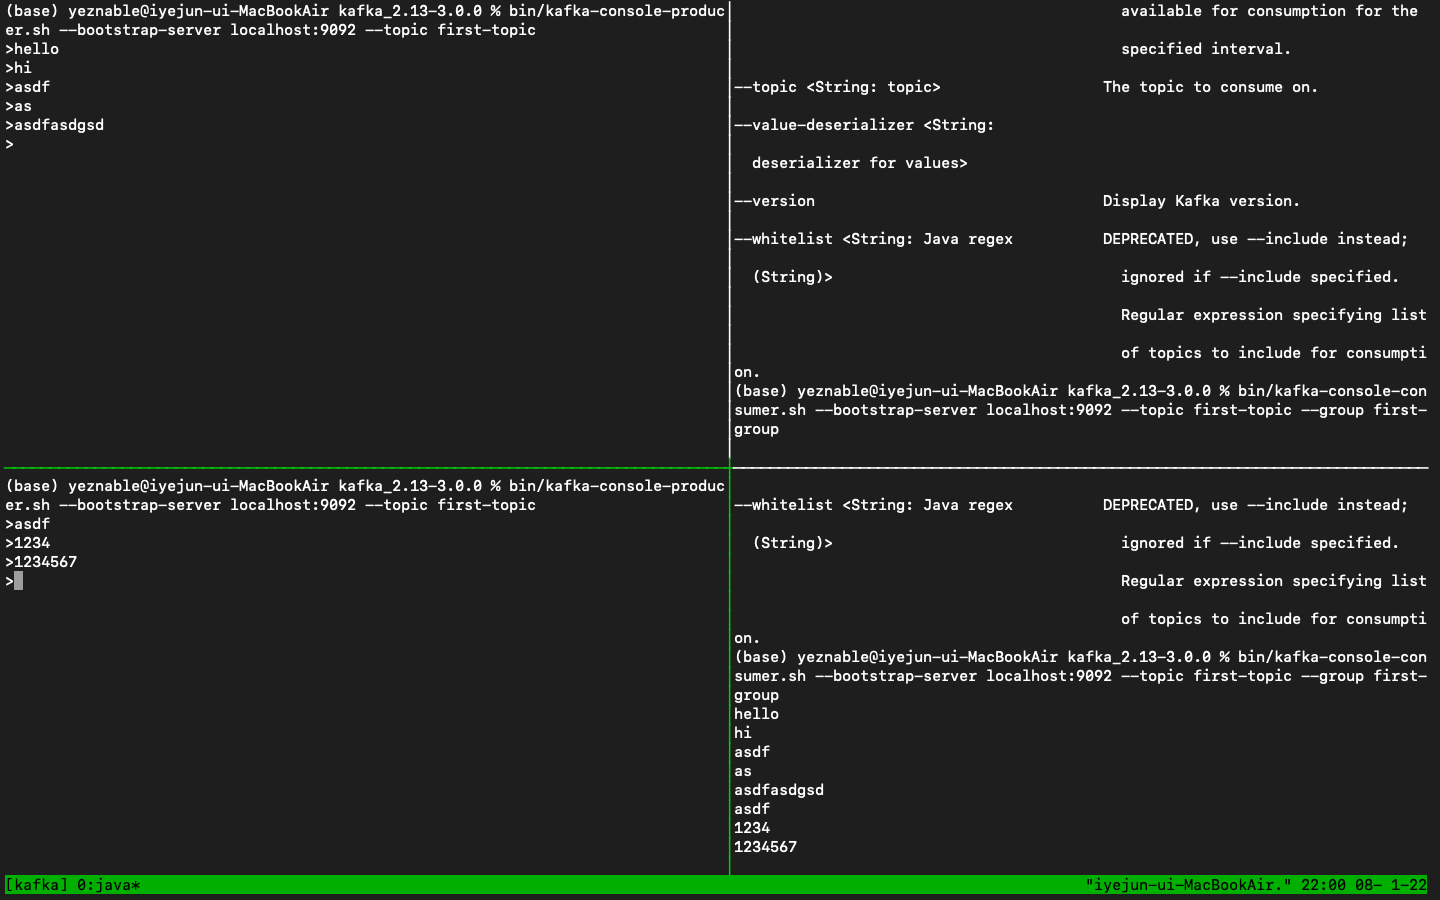

새롭게 Partition이 2개인 Topic을 만들어서 똑같이 해보면 다음과 같이 메시지가 분배되어 전달되는 것을 확인 할 수 있다
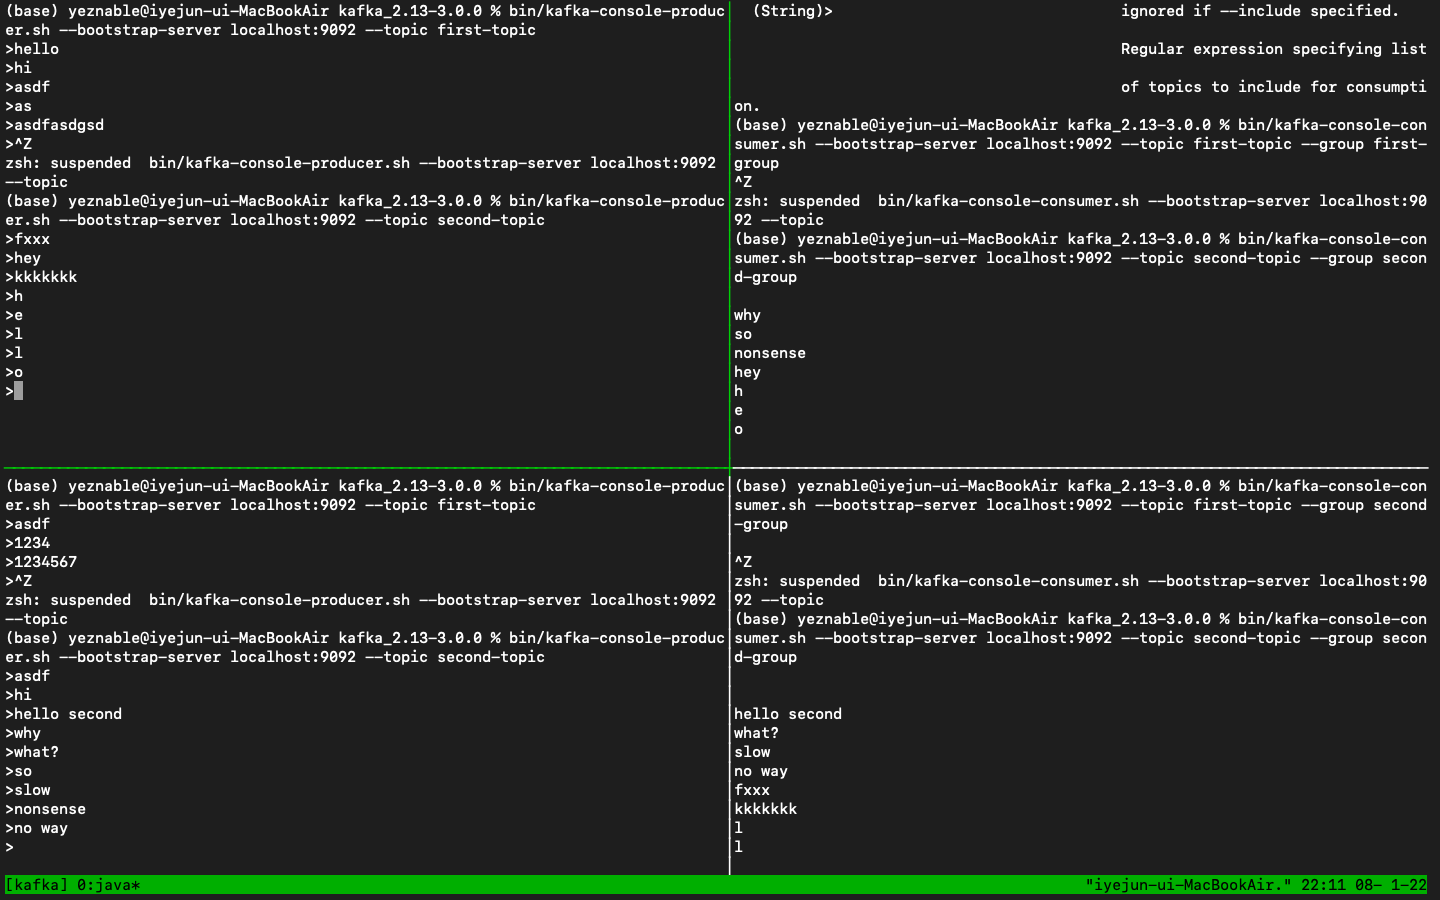